In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [167]:
train=pd.read_csv('TRAINING_.csv')
test=pd.read_csv('TEST_.csv')

In [168]:
train.head(5)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [169]:
test.head(5)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [170]:
train.shape,test.shape

((7000, 14), (3299, 13))

In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        6998 non-null   float64
 3   Nbedrooms    6997 non-null   float64
 4   Nbwashrooms  6998 non-null   float64
 5   Twashrooms   6999 non-null   float64
 6   roof         5647 non-null   object 
 7   Roof(Area)   5647 non-null   float64
 8   Lawn(Area)   6998 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          6999 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3298 non-null   float64
 3   Nbedrooms    3298 non-null   float64
 4   Nbwashrooms  3298 non-null   float64
 5   Twashrooms   3299 non-null   int64  
 6   roof         2646 non-null   object 
 7   Roof(Area)   2646 non-null   float64
 8   Lawn(Area)   3298 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3298 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   object 
dtypes: float64(6), int64(5), object(2)
memory usage: 335.2+ KB


In [173]:
test.describe()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB
count,3299.000000,3299.000000,3298.000000,3298.000000,3298.000000,3299.000000,2646.000000,3298.000000,3299.000000,3298.000000,3299.000000
mean,1650.000000,324.530464,6.982110,5.001516,4.006367,5.501667,47.267196,90.130079,4.507123,79.142207,3.493483
std,952.483596,20.329783,1.419773,1.625266,1.547437,1.467532,48.943608,11.849568,1.780613,11.812589,1.696732
min,1.000000,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000
25%,825.500000,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000
50%,1650.000000,324.000000,7.000000,5.000000,4.000000,6.000000,0.000000,90.000000,5.000000,79.000000,3.000000
75%,2474.500000,342.000000,8.000000,6.000000,5.000000,7.000000,95.000000,100.000000,6.000000,89.000000,5.000000
max,3299.000000,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000


In [174]:
test.isnull().sum()

id               0
Area(total)      0
Troom            1
Nbedrooms        1
Nbwashrooms      1
Twashrooms       0
roof           653
Roof(Area)     653
Lawn(Area)       1
Nfloors          0
API              1
ANB              0
EXPECTED         0
dtype: int64

In [175]:
#drop null values

In [177]:
train.dropna(subset=['Troom'],inplace=True)
test.Troom.fillna(train.Troom.mode()[0],inplace=True)
train.dropna(subset=['Nbedrooms'],inplace=True)
test.Nbedrooms.fillna(train.Nbedrooms.mode()[0],inplace=True)
train.dropna(subset=['Nbwashrooms'],inplace=True)
test.Nbwashrooms.fillna(train.Nbwashrooms.mode()[0],inplace=True)
train.dropna(subset=['Twashrooms'],inplace=True)
train['roof']=train['roof'].apply(lambda x: 'no' if str(x).strip().upper()=='NO' else x)
train['roof']=train['roof'].apply(lambda x: 'yes' if str(x).strip().upper()=='YES' else x)
test['roof']=test['roof'].apply(lambda x: 'no' if str(x).strip().upper()=='NO' else x)
test['roof']=test['roof'].apply(lambda x: 'yes' if str(x).strip().upper()=='YES' else x)
train.roof.fillna('none',inplace=True)
test.roof.fillna('none',inplace=True)
train['Roof(Area)'].fillna(0,inplace=True)
test['Roof(Area)'].fillna(0,inplace=True)
train.dropna(subset=['Lawn(Area)'],inplace=True)
test["Lawn(Area)"].fillna(train["Lawn(Area)"].mean(),inplace=True)
train.dropna(subset=['API'],inplace=True)
test.API.fillna(train.API.mean(),inplace=True)

In [178]:
train.Troom.mode()[0]

9.0

In [179]:
#train.isnull().sum(),test.isnull().sum()
test.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
dtype: int64

In [180]:
#change datatype to int
#train data
train.Troom=train.Troom.astype(int)
train.Nbedrooms=train.Nbedrooms.astype(int)
train.Nbwashrooms=train.Nbwashrooms.astype(int)
train.Twashrooms=train.Twashrooms.astype(int)
train['Roof(Area)']=train['Roof(Area)'].astype(int)
train['Lawn(Area)']=train['Lawn(Area)'].astype(int)
train['API']=train['API'].astype(int)
#test data
test.Troom=test.Troom.astype(int)
test.Nbedrooms=test.Nbedrooms.astype(int)
test.Nbwashrooms=test.Nbwashrooms.astype(int)
test.Twashrooms=test.Twashrooms.astype(int)
test['Roof(Area)']=test['Roof(Area)'].astype(int)
test['Lawn(Area)']=test['Lawn(Area)'].astype(int)
test['API']=test['API'].astype(int)

In [181]:
train['EXPECTED']=train['EXPECTED'].str.replace('$','')
test['EXPECTED']=test['EXPECTED'].str.replace('$','')

In [182]:
train.head(2)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8,2,1,3,no,0,76,2,63,4,D,3826
1,2,344,6,7,7,8,no,0,83,7,97,1,B,4458


In [183]:
test.head(2)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9,5,3,5,none,0,84,5,91,6,4422
1,2,311,6,5,5,6,no,0,86,6,83,4,3432


In [184]:
train['EXPECTED']=train['EXPECTED'].astype(int)
test['EXPECTED']=test['EXPECTED'].astype(int)

In [185]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train['roof']=lb.fit_transform(train['roof'])
test['roof']=lb.fit_transform(test['roof'])

In [186]:
train.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8,2,1,3,0,0,76,2,63,4,D,3826
1,2,344,6,7,7,8,0,0,83,7,97,1,B,4458
2,3,294,8,4,3,4,2,97,78,1,88,4,C,4199
3,4,328,5,4,2,4,0,0,91,5,86,1,D,3462
4,5,295,9,5,3,5,1,0,97,4,93,3,C,4543


In [187]:
train.Grade.unique()

array(['D', 'B', 'C', 'A', 'E'], dtype=object)

In [188]:
train[train.Grade=="E"].head(2)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
426,427,291,5,2,2,4,0,0,82,1,94,5,E,3538
678,679,290,5,2,2,4,0,0,85,2,61,2,E,3308


In [201]:
train_data=train.copy()

In [202]:
train_data.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [203]:
train_data.Grade

0       D
1       B
2       C
3       D
4       C
       ..
6995    D
6996    D
6997    D
6998    B
6999    C
Name: Grade, Length: 6989, dtype: object

In [204]:
grade_map={'A':4,'B':3,'C':2,'D':1,'E':0}
train_data["Grade"]=train_data['Grade'].replace(grade_map)

In [205]:
train_data.head(2)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8,2,1,3,0,0,76,2,63,4,1,3826
1,2,344,6,7,7,8,0,0,83,7,97,1,3,4458


In [206]:
train_data.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6989 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           6989 non-null   int64
 1   Area(total)  6989 non-null   int64
 2   Troom        6989 non-null   int32
 3   Nbedrooms    6989 non-null   int32
 4   Nbwashrooms  6989 non-null   int32
 5   Twashrooms   6989 non-null   int32
 6   roof         6989 non-null   int32
 7   Roof(Area)   6989 non-null   int32
 8   Lawn(Area)   6989 non-null   int32
 9   Nfloors      6989 non-null   int64
 10  API          6989 non-null   int32
 11  ANB          6989 non-null   int64
 12  Grade        6989 non-null   int64
 13  EXPECTED     6989 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 573.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id         

(None, None)

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


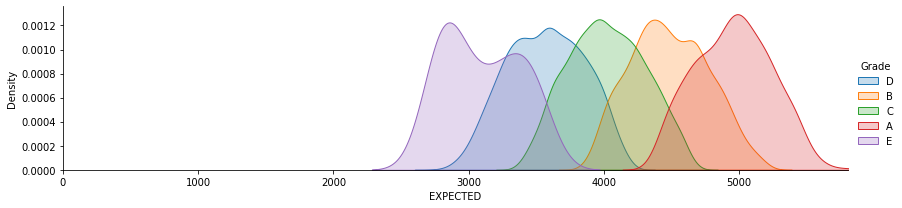

In [207]:
faceg=sns.FacetGrid(train,hue='Grade',aspect=4)
faceg.map(sns.kdeplot,'EXPECTED',shade=True)
faceg.set(xlim=(0,train['EXPECTED'].max()))
faceg.add_legend()
plt.show()

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\kamal\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


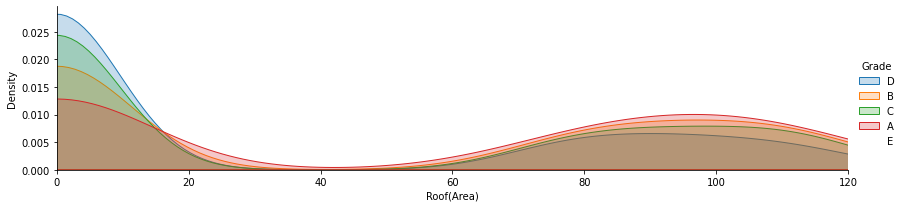

In [201]:
faceg=sns.FacetGrid(train,hue='Grade',aspect=4)
faceg.map(sns.kdeplot,'Roof(Area)',shade=True)
faceg.set(xlim=(0,train['Roof(Area)'].max()))
faceg.add_legend()
plt.show()

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


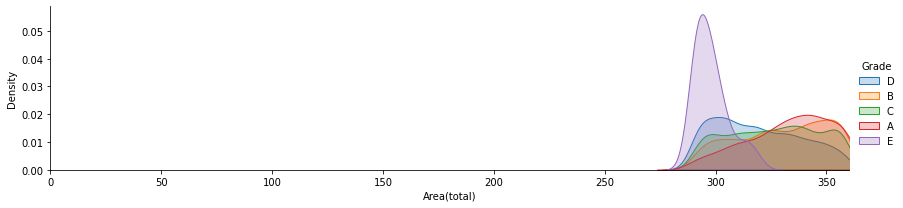

In [202]:
faceg=sns.FacetGrid(train,hue='Grade',aspect=4)
faceg.map(sns.kdeplot,'Area(total)',shade=True)
faceg.set(xlim=(0,train['Area(total)'].max()))
faceg.add_legend()
plt.show()

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


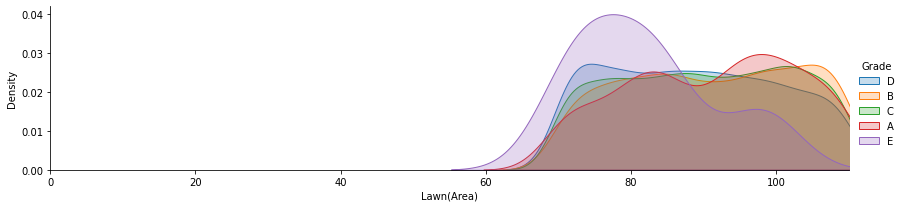

In [203]:
faceg=sns.FacetGrid(train,hue='Grade',aspect=4)
faceg.map(sns.kdeplot,'Lawn(Area)',shade=True)
faceg.set(xlim=(0,train['Lawn(Area)'].max()))
faceg.add_legend()
plt.show()

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


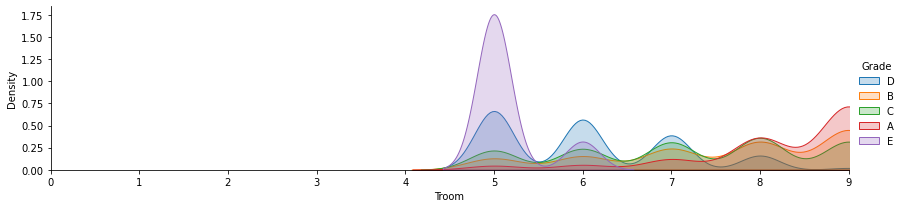

In [204]:
faceg=sns.FacetGrid(train,hue='Grade',aspect=4)
faceg.map(sns.kdeplot,'Troom',shade=True)
faceg.set(xlim=(0,train['Troom'].max()))
faceg.add_legend()
plt.show()

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


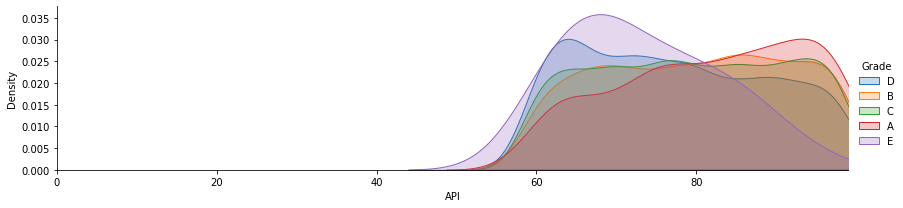

In [205]:
faceg=sns.FacetGrid(train,hue='Grade',aspect=4)
faceg.map(sns.kdeplot,'API',shade=True)
faceg.set(xlim=(0,train['API'].max()))
faceg.add_legend()
plt.show()

In [210]:
X=train_data.drop('Grade',axis=1)
Y=train_data['Grade']

In [211]:
X.shape,Y.shape

((6989, 13), (6989,))

In [212]:
train_data.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [213]:
Y.isnull().sum()

0

In [214]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=13)

In [58]:
Y_train

88      2
514     3
3135    2
64      2
1043    2
       ..
870     2
2797    1
76      3
6330    1
342     2
Name: Grade, Length: 4542, dtype: int64

In [59]:
X_test.isnull().sum()

id             0
Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
dtype: int64

In [230]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [38]:
k_foldc=KFold(n_splits=10,shuffle=True,random_state=0)

In [39]:
dc=DecisionTreeClassifier()
scoring='accuracy'
accuracy_score=cross_val_score(dc,X_train,Y_train,cv=k_foldc,n_jobs=1,scoring=scoring)

In [40]:
print(accuracy_score)

[0.78021978 0.7978022  0.76872247 0.77092511 0.81718062 0.7753304
 0.73568282 0.77753304 0.75110132 0.8215859 ]


In [41]:
#round_score
Acc_score=round(np.mean(accuracy_score)*100,2)
print(Acc_score)

77.96


In [42]:
rc=RandomForestClassifier(n_estimators=15)
scoring='accuracy'
accuracy_score_rc=cross_val_score(rc,X_train,Y_train,cv=k_foldc,n_jobs=1,scoring=scoring)
print(accuracy_score_rc)

[0.85714286 0.85274725 0.8215859  0.85022026 0.86343612 0.85462555
 0.83920705 0.87665198 0.83259912 0.83700441]


In [43]:
#RANDOMFOREST_SCORE
acc=round(np.mean(accuracy_score_rc)*100,2)
print(acc)

84.85


In [46]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((4542, 13), (4542,), (2447, 13), (2447,))

In [47]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
y_predict_knn=knn.predict(X_test)
accuracy_knn=round(knn.score(X_train,Y_train)*100,2)
print(accuracy_knn)

70.26


In [81]:
#RandomForestClassifier
random_forestc=RandomForestClassifier(n_estimators=70,max_depth=15)
random_forestc.fit(X,Y)
y_predict=random_forestc.predict(X_test)
random_forestc.score(X,Y)
accuracy_rc=round(random_forestc.score(X,Y)*100,2)
print(accuracy_rc)
#print(round(random_forestc.score(X,Y)*100,2))

99.96


In [319]:
#svc
svc=SVC()
svc.fit(X_train,Y_train)
y_predict_svc=svc.predict(test)
svc.score(X_train,Y_train)
accuracy_svc=round(svc.score(X_train,Y_train)*100,2)
print(accuracy_svc)

64.73


In [321]:
dc=DecisionTreeClassifier()
dc.fit(X_train,Y_train)
y_predict_dc=dc.predict(X_test)
accuracy_dc=round(dc.score(X_train,Y_train)*100,2)
print(accuracy_dc)
dc.score(X_test,Y_test)

100.0


0.8034327748263179

In [62]:
test.shape,Y_test.shape

((3294, 13), (2447,))

In [256]:
X_test_data=test
rc2=RandomForestClassifier(n_estimators=50,max_depth=15)
rc2.fit(X_train,Y_train)
y_presict_rc2=rc2.predict(X_test_data)
acc_rc2=round(rc2.score(X_train,Y_train)*100,2)
print(acc_rc2)
print(rc2.score(X_test,Y_test))

99.98
0.8806702084184715


In [91]:
from sklearn.metrics import classification_report,confusion_matrix,RocCurveDisplay

In [499]:
from sklearn.model_selection import GridSearchCV

In [233]:
import xgboost as xgb
from xgboost import XGBClassifier

In [330]:
xg=XGBClassifier(n_estimators=35)
xg.fit(X_train,Y_train)
y_predict_xg=xg.predict(test)
acc_xg=round(xg.score(X_train,Y_train)*100,2)
print(acc_xg)
print(xg.score(X_test,Y_test))

99.89
0.9088680016346546


In [627]:
param_grid={
    'n_estimators':[30,40,50,80,90],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5],
    'min_child_weight':[1,2,3],
    'colsample_bytree':[0.7,0.8,0.9],
    'gamma':[0,0.1,0.2]
}

In [628]:
gscv=GridSearchCV(estimator=xg,param_grid=param_grid,scoring='accuracy',cv=5)
gscv.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=32, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [30, 40, 50, 80, 90]},
             scoring='accuracy')

In [629]:
gscv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 90}

In [235]:
params_gri={
    'n_estimators':90,
    'learning_rate':0.2,
    'max_depth':5,
    'min_child_weight':3,
    'colsample_bytree':0.8,
    'gamma':0.1
}

In [236]:
mdl_xg=XGBClassifier(params_gri)

In [237]:
mdl_xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [240]:
print("train:",mdl_xg.score(X_train,Y_train))
print("test:",mdl_xg.score(X_test,Y_test))

train: 1.0
test: 0.9203105843890478


In [239]:
xg_pr=mdl_xg.predict(test)
print(xg_pr)

[3 1 2 ... 2 1 1]


In [247]:
from catboost import CatBoostClassifier
cat_boost=CatBoostClassifier()
cat_boost.fit(X_train,Y_train)
yzerocat=cat_boost.predict(test)

Learning rate set to 0.085476
0:	learn: 1.4519434	total: 14ms	remaining: 14s
1:	learn: 1.3288430	total: 25.7ms	remaining: 12.8s
2:	learn: 1.2261496	total: 39.2ms	remaining: 13s
3:	learn: 1.1431202	total: 52.1ms	remaining: 13s
4:	learn: 1.0694951	total: 64.8ms	remaining: 12.9s
5:	learn: 1.0095855	total: 77.2ms	remaining: 12.8s
6:	learn: 0.9565339	total: 88.4ms	remaining: 12.5s
7:	learn: 0.9075767	total: 100ms	remaining: 12.5s
8:	learn: 0.8642416	total: 113ms	remaining: 12.4s
9:	learn: 0.8278616	total: 126ms	remaining: 12.5s
10:	learn: 0.7933531	total: 139ms	remaining: 12.5s
11:	learn: 0.7629473	total: 151ms	remaining: 12.5s
12:	learn: 0.7317667	total: 164ms	remaining: 12.4s
13:	learn: 0.7045798	total: 175ms	remaining: 12.3s
14:	learn: 0.6818502	total: 188ms	remaining: 12.3s
15:	learn: 0.6613889	total: 200ms	remaining: 12.3s
16:	learn: 0.6433896	total: 214ms	remaining: 12.3s
17:	learn: 0.6214002	total: 225ms	remaining: 12.3s
18:	learn: 0.6019748	total: 238ms	remaining: 12.3s
19:	learn: 0

In [253]:
print("train accuracy:",round(cat_boost.score(X_train,Y_train)*100,2))
print("test_accuracy:",round(cat_boost.score(X_test,Y_test)*100,2))

train accuracy: 100.0
test_accuracy: 94.73


In [339]:
#tune model
from catboost import CatBoostClassifier
cat_boost=CatBoostClassifier(depth=5,random_seed=500)
cat_boost.fit(X_train,Y_train)
y_pred=cat_boost.predict(test)

Learning rate set to 0.085476
0:	learn: 1.4597252	total: 11ms	remaining: 11s
1:	learn: 1.3404888	total: 21.1ms	remaining: 10.5s
2:	learn: 1.2355010	total: 29.8ms	remaining: 9.9s
3:	learn: 1.1605986	total: 38.6ms	remaining: 9.61s
4:	learn: 1.0972670	total: 45ms	remaining: 8.95s
5:	learn: 1.0328439	total: 53.8ms	remaining: 8.91s
6:	learn: 0.9776340	total: 62.7ms	remaining: 8.9s
7:	learn: 0.9291813	total: 71.5ms	remaining: 8.87s
8:	learn: 0.8855339	total: 79.7ms	remaining: 8.77s
9:	learn: 0.8510462	total: 88.3ms	remaining: 8.74s
10:	learn: 0.8181023	total: 97ms	remaining: 8.72s
11:	learn: 0.7863083	total: 106ms	remaining: 8.69s
12:	learn: 0.7571072	total: 115ms	remaining: 8.7s
13:	learn: 0.7323670	total: 122ms	remaining: 8.62s
14:	learn: 0.7082379	total: 131ms	remaining: 8.58s
15:	learn: 0.6822932	total: 139ms	remaining: 8.56s
16:	learn: 0.6637363	total: 148ms	remaining: 8.57s
17:	learn: 0.6446019	total: 156ms	remaining: 8.53s
18:	learn: 0.6262327	total: 165ms	remaining: 8.52s
19:	learn: 

In [340]:
print("train accuracy:",round(cat_boost.score(X_train,Y_train)*100,2))
print("test_accuracy:",round(cat_boost.score(X_test,Y_test)*100,2))

train accuracy: 99.93
test_accuracy: 94.73


In [341]:
#{'A':4,'B':3,'C':2,'D':1,'E':0}
s=[]
for i in y_pred:
    if i==3:
        s.append("B")
    elif i==1:
        s.append("D")
    elif i==2:
        s.append("C")
    elif i==0:
        s.append("E")
    else:
        s.append("A")

In [342]:
len(s),len(test)

(3299, 3299)

In [343]:
submission=pd.DataFrame({
    "id":test['id'],
    'Grade':s
})
submission.to_csv('./submission_003.csv',index=False)

In [344]:
test

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9,5,3,5,1,0,84,5,91,6,4422
1,2,311,6,5,5,6,0,0,86,6,83,4,3432
2,3,342,5,6,6,7,2,120,85,4,95,5,4066
3,4,329,7,7,4,6,1,0,105,5,97,6,4322
4,5,307,6,2,3,4,0,0,76,2,64,4,3031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7,3,3,4,1,0,100,5,89,4,3858
3295,3296,338,7,3,2,4,0,0,87,3,75,6,3714
3296,3297,307,8,4,5,6,2,88,88,4,83,6,3824
3297,3298,352,5,3,4,5,2,88,100,2,99,4,3533


In [345]:
submission_data=pd.read_csv('submission_003.csv')
submission_data.head()

,id,Grade
0,1,B
1,2,D
2,3,C
3,4,B
4,5,D


In [346]:
y_pred

array([[3],
       [1],
       [2],
       ...,
       [2],
       [2],
       [1]], dtype=int64)